# Boston Crime Data Analysis

## Introduction

This is a dataset containing records from the new crime incident report system in Boston, It includes information about each incident recored in the Boston Crime department.
Columns included in the dataset are: 

* INCIDENT_NUMBER: Incident number is a unique number provided to each incident which has been recorded by the Department
* OFFENSE_CODE: Each crime as a offense code describing the type of crime
* OFFENSE_CODE_GROUP: Each crime offense code has offense group code describing the type of crime
* OFFENSE_DESCRIPTION: Description of the Crime recorded
* DISTRICT: District where the crimes was recorded
* REPORTING_AREA:Location where the crime was reported.
* SHOOTING: Whether the crime recorded involved any gun violence, If Yes then 'Y' else Null. 
* OCCURRED_ON_DATE: Date of the Crime recorded
* YEAR: Year in which the crime was recorded
* MONTH: Month in which the crime was recorded
* DAY_OF_WEEK: Day of the week in which the crime was recorded
* HOUR: Hour at which the crime was recorded
* UCR_PART: The Uniform Crime Reporting (UCR) program compiles official data on crime in the United States, published by the               Federal Bureau of Investigation (FBI). All crimes are assigned a UCR_PART like Part 1, 2, 3 and Other, depending               upon the crime. Part 1 being a crime where Arrest is complusary based on the crime. and Others being a Crime not               known. 
* STREET:  Street number of the Crime occurance
* LATITUDE: Geographic co-ordinates of the crime location
* LONGITUDE: Geographic co-ordinates of the crime location
* LOCATION: Geographic co-ordinates of the crime location

Link to dataset: https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpnpw8nbpv.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import statsmodels.api as sm


#graph inline
%matplotlib inline

In [2]:
#importing fucntions from Pycharm file
from Panchal_Jigar_Capstone_Project_Code import eda_missing_nunique

### Data Extraction

In [3]:
#importing dataset
df = pd.read_csv('https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpnpw8nbpv.csv', encoding='latin-1')
pd.set_option('display.max_columns', 500) #displaying all the coloumns while printing head

In [4]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [5]:
#checking the number of rows and columns
df.shape

(394611, 17)

### Data Pre-processing

In [6]:
#checking count,missing,nunique values of all columns using the function created
eda_missing_nunique(df)

,Data type,Total number of values,Total Missing Values,Percentage missing,Count of unique values
INCIDENT_NUMBER,object,394611,0,0.000000,347613
OFFENSE_CODE,int64,394611,0,0.000000,222
OFFENSE_CODE_GROUP,object,394611,0,0.000000,67
OFFENSE_DESCRIPTION,object,394611,0,0.000000,244
DISTRICT,object,394611,2050,0.519499,12
REPORTING_AREA,object,394611,0,0.000000,880
SHOOTING,object,394611,393026,99.598339,1
OCCURRED_ON_DATE,object,394611,0,0.000000,286576
YEAR,int64,394611,0,0.000000,5
MONTH,int64,394611,0,0.000000,12


In [7]:
# Convert OCCURED_ON_DATE to datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

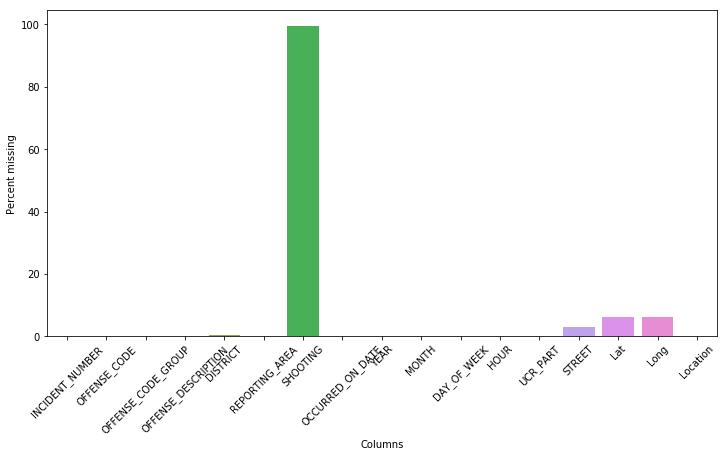

In [8]:
#Plotting a bar char to plot percentage of null values in the dataset
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Columns","Percent missing"]
plt.figure(figsize = (12,6))
plt.xticks(rotation=45)
sns.barplot(x = "Columns",y ="Percent missing",data = null_vals)

In [9]:
# Fill in NANs in SHOOTING column with N as 'NO'
df.SHOOTING.fillna('N', inplace=True)

In [10]:
# Replace -1 values in Lat and Long 
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

In [11]:
#checking the null values in Shooting column
eda_missing_nunique(df)

,Data type,Total number of values,Total Missing Values,Percentage missing,Count of unique values
INCIDENT_NUMBER,object,394611,0,0.000000,347613
OFFENSE_CODE,int64,394611,0,0.000000,222
OFFENSE_CODE_GROUP,object,394611,0,0.000000,67
OFFENSE_DESCRIPTION,object,394611,0,0.000000,244
DISTRICT,object,394611,2050,0.519499,12
REPORTING_AREA,object,394611,0,0.000000,880
SHOOTING,object,394611,0,0.000000,2
OCCURRED_ON_DATE,datetime64[ns],394611,0,0.000000,286576
YEAR,int64,394611,0,0.000000,5
MONTH,int64,394611,0,0.000000,12


Lets check types of Crimes in the Boston City and drop rows which are not actually a crime

In [12]:
df_od = df.groupby('OFFENSE_DESCRIPTION').size().reset_index(name = 'counts').set_index('OFFENSE_DESCRIPTION').sort_values(by = 'counts', ascending = False)

In [13]:
df_od

,counts
OFFENSE_DESCRIPTION,
SICK/INJURED/MEDICAL - PERSON,24002
INVESTIGATE PERSON,23025
M/V - LEAVING SCENE - PROPERTY DAMAGE,20193
ASSAULT SIMPLE - BATTERY,18348
VANDALISM,18294
VERBAL DISPUTE,16354
INVESTIGATE PROPERTY,13975
TOWED MOTOR VEHICLE,13868
THREATS TO DO BODILY HARM,11300


Some large classes here aren't crimes at all. We have to fix that. Let's focus on the UCR Part numbers.

According to Wikipedia, UCR part I and part II offenses are actually offenses. As for part III let's check what they actually are. Link https://en.wikipedia.org/wiki/Uniform_Crime_Reports

In [14]:
df_ucr = df.groupby('UCR_PART').size().reset_index(name = 'counts').set_index('UCR_PART')

In [15]:
df_ucr

,counts
UCR_PART,
Other,1520
Part One,74757
Part Three,197745
Part Two,120485


In [16]:
#analyze Part Three 
df_p3 = df.loc[df['UCR_PART'] == 'Part Three']

In [17]:
df_3d = df_p3.groupby('OFFENSE_DESCRIPTION').size().reset_index(name = 'counts').set_index('OFFENSE_DESCRIPTION')

In [18]:
df_3d

,counts
OFFENSE_DESCRIPTION,
AIRCRAFT INCIDENTS,52
ANIMAL CONTROL - DOG BITES - ETC.,451
ANIMAL INCIDENTS,343
DANGEROUS OR HAZARDOUS CONDITION,356
DEATH INVESTIGATION,1480
DEMONSTRATIONS/RIOT,318
EXPLOSIVES - TURNED IN OR FOUND,16
"FIRE REPORT - CAR, BRUSH, ETC.",627
"FIRE REPORT - HOUSE, BUILDING, ETC.",1533


Most of them are non-criminal or unrelated to what we usually think of as "crimes".
So if we consider serious crime we need to drop or ignore the Part three .


In [19]:
# analyzing  UCR Others 
df_other = df.loc[df['UCR_PART'] == 'Other']

In [20]:
df_otherd = df_other.groupby('OFFENSE_DESCRIPTION').size().reset_index(name = 'counts').set_index('OFFENSE_DESCRIPTION')
df_otherd

,counts
OFFENSE_DESCRIPTION,
ARSON,106
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON,1
B&E NON-RESIDENCE DAY - NO PROP TAKEN,2
B&E RESIDENCE DAY - NO PROP TAKEN,3
KILLING OF FELON BY POLICE,1
MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE,2
MANSLAUGHTER - VEHICLE - NEGLIGENCE,7
PROPERTY - CONCEALING LEASED,32
RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON),1278


These are related to Crime, Hence we need to keep this part of data.

In [21]:
# checking NULL values of UCR_PART
df_ucrnull = df.loc[df['UCR_PART'].isnull()]
df_ucrnulld = df_ucrnull.groupby('OFFENSE_DESCRIPTION').size().reset_index(name = 'counts').set_index('OFFENSE_DESCRIPTION')
df_ucrnulld

,counts
OFFENSE_DESCRIPTION,
HOME INVASION,88
HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,8
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,3
INVESTIGATE PERSON,5


In [22]:
#So now we prepared a clean data eliminating non crime data from the dataset
df_clean = df.loc[(df['UCR_PART'] != 'Part Three') & (df['OFFENSE_DESCRIPTION'] != 'INVESTIGATE PERSON')]

In [23]:
df_clean.shape

(196861, 17)

#### Exploratory Data Analysis

In [24]:
#Checking number of Crimes on each day of the Weak
df_day = df_clean.groupby('DAY_OF_WEEK').size().reset_index(name = 'counts').set_index('DAY_OF_WEEK')

In [25]:
df_day

,counts
DAY_OF_WEEK,
Friday,29857
Monday,28314
Saturday,27199
Sunday,24241
Thursday,29056
Tuesday,28848
Wednesday,29346


Most of the Crimes occur on Friday

In [26]:
df_day.reset_index(inplace = True)

In [27]:
df_day['DAY_OF_WEEK'] = pd.Categorical(df_day['DAY_OF_WEEK'], categories = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered = True)

In [28]:
df_day.set_index('DAY_OF_WEEK', inplace = True)

In [29]:
df_day.sort_values(by = 'DAY_OF_WEEK', inplace = True)

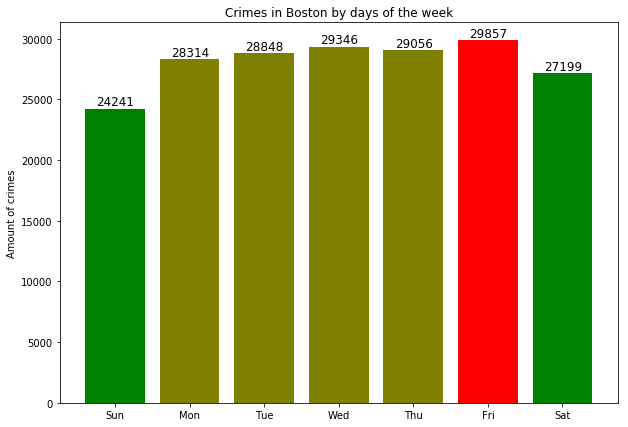

In [30]:
fig = plt.figure(figsize = (10,7))
ax = plt.subplot(111)
ind = np.arange(7)
crimes_by_day = df_day['counts']
rects = ax.bar(ind, crimes_by_day, width = 0.8, color = ['green','olive','olive','olive','olive','red','green'])
ax.set_xticks(ind)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax.set_title('Crimes in Boston by days of the week')
ax.set_ylabel('Amount of crimes')
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + 0.15, height + 250, height, fontsize = 12)

In [31]:
# Lets check the number of Crimes each Year
YEAR_uni = list(df_clean.YEAR.unique())
YEAR_uni_table = pd.DataFrame(YEAR_uni)
YEAR_uni_table.columns = ['unique values']
YEAR_uni_table

,unique values
0,2019
1,2018
2,2016
3,2017
4,2015


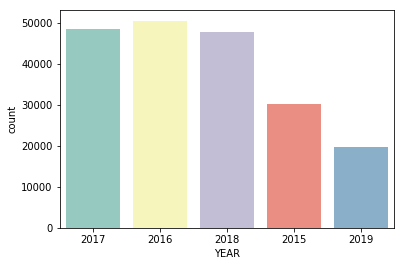

In [32]:
# Total number of Crimes recorded each year
sns.countplot (x="YEAR" , data =df_clean ,order = df['YEAR'].value_counts().index, palette = "Set3")

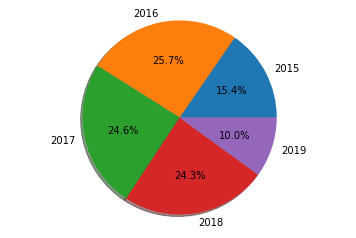

In [33]:
# Percentage of crime in year wise
labels = df_clean['YEAR'].astype('category').cat.categories.tolist()
counts = df_clean['YEAR'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()

Checking the Crimes in Each month from 2016 to year 2018 as it has an entire years data, eliminating 2015 and 2019 as it has incomplete data


In [34]:
df_1618 = df_clean.loc[(df_clean['YEAR'] > 2015) & (df_clean['YEAR'] < 2019)]

In [35]:
df_1618.shape

(146810, 17)

In [36]:
df_month = df_1618.groupby('MONTH').size().reset_index(name = 'counts').set_index('MONTH')

In [37]:
df_month

,counts
MONTH,
1,11953
2,10779
3,11772
4,12015
5,12968
6,13060
7,13214
8,13373
9,12677


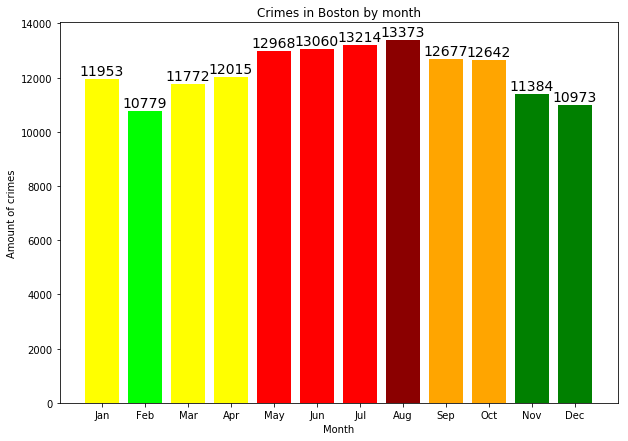

In [38]:
#Plotting Each months crime data from 2016 - 2018
fig3 = plt.figure(figsize = (10,7))
ind3 = np.arange(12)
ax3 = plt.subplot(111)
rects = ax3.bar(ind3, df_month['counts'], width = 0.8,color = ['yellow','lime','yellow','yellow','red','red','red','darkred','orange','orange','green','green'])
ax3.set_xticks(ind3)
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax3.set_xlabel('Month')
ax3.set_ylabel('Amount of crimes')
ax3.set_title('Crimes in Boston by month')
for rect in rects:
    height = rect.get_height()
    ax3.text(rect.get_x() - 0.13, height + 150, height, fontsize = 14)

The number of Crime increases in the Summer season and decreases in the Winter.

To be more precise to see if the crime occured in Day or Night we shall map the crime data with boston month day and night time and mark each rows with a the Day and Night category 
Link
https://www.timeanddate.com/sun/usa/boston

In [39]:
df_clean['Day'] = 0
df_clean['Night'] = 0

C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_clean.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Day,Night
5,I192044948,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,C6,220,N,2019-06-05 02:20:00,2019,6,Wednesday,2,Part One,NATIONAL ST,42.334164,-71.046693,"(42.33416417, -71.04669326)",0,0
6,I192044947,2647,Other,THREATS TO DO BODILY HARM,B2,183,N,2019-06-13 19:57:00,2019,6,Thursday,19,Part Two,LEYLAND ST,42.320661,-71.070679,"(42.32066147, -71.07067867)",0,0
9,I192044943,301,Robbery,ROBBERY - STREET,C6,177,N,2019-06-12 23:30:00,2019,6,Wednesday,23,Part One,SOUTHAMPTON ST,42.331819,-71.068682,"(42.33181880, -71.06868237)",0,0
11,I192044940,1874,Drug Violation,DRUGS - OTHER,B2,282,N,2019-06-13 20:39:00,2019,6,Thursday,20,Part Two,WASHINGTON ST,42.328663,-71.085634,"(42.32866284, -71.08563401)",0,0
12,I192044939,724,Auto Theft,AUTO THEFT,E13,581,N,2019-06-13 07:30:00,2019,6,Thursday,7,Part One,BICKFORD ST,NaN,NaN,"(0.00000000, 0.00000000)",0,0


In [41]:
# Day or night for 1st month
df_clean['Day'].loc[(df_clean['MONTH'] == 1) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 18)] = 1

# Day or night for 2st month
df_clean['Day'].loc[(df_clean['MONTH'] == 2) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 19)] = 1

# for 3st month
df_clean['Day'].loc[(df_clean['MONTH'] == 3) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 20)] = 1

# Day or night for 4st month
df_clean['Day'].loc[(df_clean['MONTH'] == 4) & (df_clean['HOUR'] >= 5) & (df_clean['HOUR'] <= 20)] = 1

# Day or night for 5st month
df_clean['Day'].loc[(df_clean['MONTH'] == 5) & (df_clean['HOUR'] >= 5) & (df_clean['HOUR'] <= 21)] = 1

# Day or night for 6st month
df_clean['Day'].loc[(df_clean['MONTH'] == 6) & (df_clean['HOUR'] >= 4) & (df_clean['HOUR'] <= 21)] = 1

# Day or night for 7st month
df_clean['Day'].loc[(df_clean['MONTH'] == 7) & (df_clean['HOUR'] >= 5) & (df_clean['HOUR'] <= 21)] = 1

# Day or night for 8st month
df_clean['Day'].loc[(df_clean['MONTH'] == 8) & (df_clean['HOUR'] >= 5) & (df_clean['HOUR'] <= 21)] = 1

# Day or night for 9st month
df_clean['Day'].loc[(df_clean['MONTH'] == 9) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 20)] = 1

# Day or night for 10st month
df_clean['Day'].loc[(df_clean['MONTH'] == 10) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 19)] = 1

# Day or night for 11st month
df_clean['Day'].loc[(df_clean['MONTH'] == 11) & (df_clean['HOUR'] >= 6) & (df_clean['HOUR'] <= 17)] = 1

# Day or night for 12st month
df_clean['Day'].loc[(df_clean['MONTH'] == 12) & (df_clean['HOUR'] >= 7) & (df_clean['HOUR'] <= 17)] = 1

C:\Users\Jigar\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A v

In [42]:
df_clean['Night'].loc[df_clean['Day']==0]=1

C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


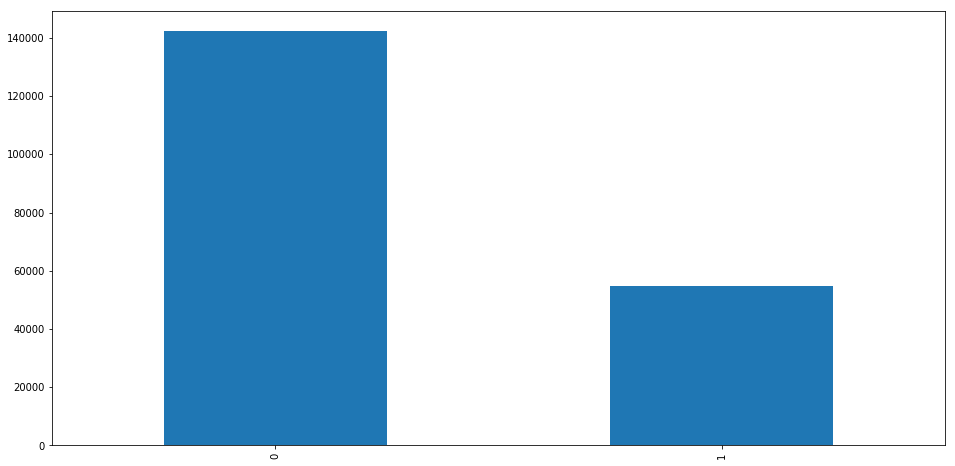

In [43]:
plt.figure(figsize=(16,8))
df_clean['Night'].value_counts().plot.bar()
plt.show()

In [44]:
#checking unique values District Columns 
DISTRICT_uni = list(df_clean.DISTRICT.unique())
DISTRICT_uni_table = pd.DataFrame(DISTRICT_uni)
DISTRICT_uni_table.columns = ['unique values']
DISTRICT_uni_table

,unique values
0,C6
1,B2
2,E13
3,A15
4,C11
5,NaN
6,D4
7,E5
8,D14
9,A1


From the above plot we can see that crime has been increasing from 2015 to 2018, 2017 recording most number of crimes

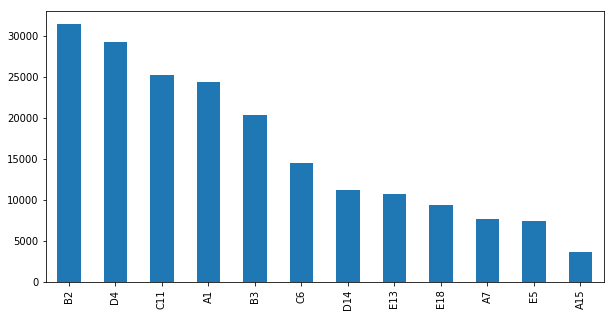

In [45]:
# PLOTING TOTAL NUMBER OF CRIMES IN EACH DISTRICT
plt.figure(figsize=(10,5))
df_clean['DISTRICT'].value_counts().plot.bar()
plt.show()

From the above plot we can see that District B2 has most number of crimes that have been recorded from 2015 to 2018

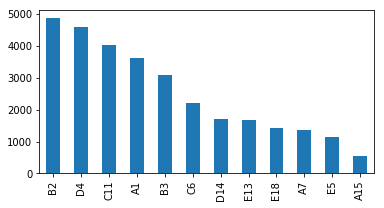

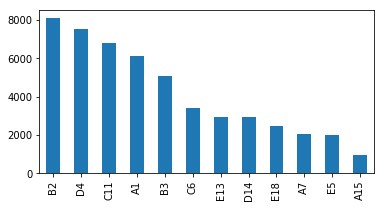

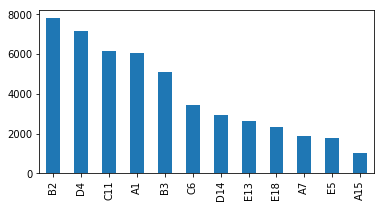

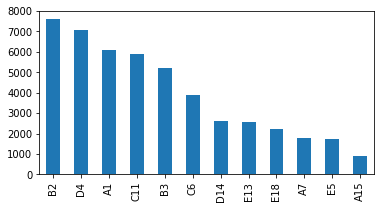

In [46]:
#plotting bar graph to identify crimes in each District in each year since 2015 to 2019
# 2015
plt.figure(figsize=(6,3))
df_clean['DISTRICT'].loc[df_clean['YEAR']==2015].value_counts().plot.bar()
plt.show()

# 2016
plt.figure(figsize=(6,3))
df_clean['DISTRICT'].loc[df_clean['YEAR']==2016].value_counts().plot.bar()
plt.show()

# 2017
plt.figure(figsize=(6,3))
df_clean['DISTRICT'].loc[df_clean['YEAR']==2017].value_counts().plot.bar()
plt.show()

# 2018
plt.figure(figsize=(6,3))
df_clean['DISTRICT'].loc[df_clean['YEAR']==2018].value_counts().plot.bar()
plt.show()


From the above plots we can clearly see that the trend of crimes has been constant in each District from 2015 to 2018, (Didn't consider 2019 as it only has few months of data)

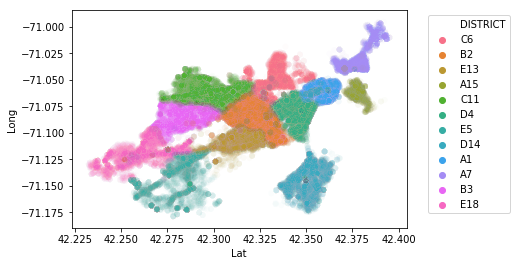

In [47]:
#ploting Districts using the Lat and Long
sns.scatterplot(x='Lat',y='Long',hue='DISTRICT',alpha=0.02,data=df_clean)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [48]:
#Shooting dataset in a new variable
df_shooting = df_clean[df_clean['SHOOTING'] == 'Y']
df_shooting.head(5)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Day,Night
650,I192044239,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,482,Y,2019-06-11 13:00:00,2019,6,Tuesday,13,Part One,BURMAH ST,42.264212,-71.097836,"(42.26421188, -71.09783579)",1,0
1277,I192043502,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,180,Y,2019-06-09 03:18:00,2019,6,Sunday,3,Part One,MAGAZINE ST,42.326817,-71.071110,"(42.32681744, -71.07111038)",0,1
1278,I192043502,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,180,Y,2019-06-09 03:18:00,2019,6,Sunday,3,Part One,MAGAZINE ST,42.326817,-71.071110,"(42.32681744, -71.07111038)",0,1
1954,I192042739,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,448,Y,2019-06-06 17:55:00,2019,6,Thursday,17,Part One,SPENCER ST,42.293843,-71.076094,"(42.29384269, -71.07609427)",1,0
2677,I192041946,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",D4,,Y,2019-06-04 10:58:00,2019,6,Tuesday,10,Part One,HUNTINGTON AVE,NaN,NaN,"(0.00000000, 0.00000000)",1,0


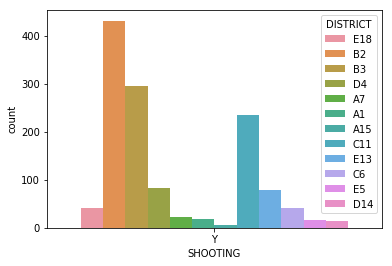

In [49]:
sns.countplot( x="SHOOTING", hue="DISTRICT", data = df_shooting)

## Prediction Modelling 

## Principal component analysis

finding most relative features

using PCA model to analysis

As seen from the Total Crime in Each District Bar plots, Distrit 'B2' also has the most Shooting cases registered  followed by B3 and C11

In [50]:
#from sklearn.preprocessing import LabelEncoder
pca =df_clean.iloc[:,:]


In [51]:
pca.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(pca.loc[:,'OFFENSE_CODE_GROUP'])
pca.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(pca.loc[:,'OFFENSE_DESCRIPTION'])
pca.loc[:,'DISTRICT']=LabelEncoder().fit_transform(pca.loc[:,'DISTRICT'].astype('str'))
pca.loc[:,'SHOOTING']=LabelEncoder().fit_transform(pca.loc[:,'SHOOTING'].astype('str'))
pca.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(pca.loc[:,'DAY_OF_WEEK'])
pca.loc[:,'UCR_PART']=LabelEncoder().fit_transform(pca.loc[:,'UCR_PART'].astype('str'))
pca.loc[:,'STREET']=LabelEncoder().fit_transform(pca.loc[:,'STREET'].astype('str'))

C:\Users\Jigar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
pca.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(pca.loc[:,'REPORTING_AREA'])

In [53]:
adata =pca.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=pca.loc[:,'MONTH']

In [54]:
#from sklearn.decomposition import PCA
pcamodel=PCA(n_components=11).fit(adata)

In [55]:
print(pcamodel.explained_variance_ratio_)
'''
top2
OFFENSE_CODE
OFFENSE_CODE_GROUP
'''

[6.82481054e-01 2.88434913e-01 2.78116215e-02 1.18561793e-03
 6.34779565e-05 1.69105873e-05 3.97015218e-06 1.75623752e-06
 6.34675475e-07 4.12057779e-08 2.71036654e-09]


'\ntop2\nOFFENSE_CODE\nOFFENSE_CODE_GROUP\n'

## PCA

With using PCA model,OFFENSE_CODE and OFFENSE_CODE_GROUP are main components

Using pearson coeffient to analysis correlation to choose features to predict

## Correlation Analysis Pearson Coefficient

In [56]:
pdata=pca.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
pearsonMatrix=pd.DataFrame(round(pdata.corr(method='pearson'),6))
pearsonMatrix.sort_values(by='MONTH',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
MONTH,-0.030732,-0.000503,-0.001144,-0.002522,0.002790,0.011948,-0.344443,0.001911,0.000288,-0.033003,-0.006989,1.000000
SHOOTING,-0.060587,-0.108009,-0.060883,-0.010602,0.006201,1.000000,-0.000967,-0.005444,0.001726,-0.058558,0.003589,0.011948
REPORTING_AREA,-0.018657,0.030225,-0.007980,0.197905,1.000000,0.006201,-0.013628,-0.006693,0.008236,0.003040,-0.079513,0.002790
DAY_OF_WEEK,0.012185,-0.005965,0.003865,0.003410,-0.006693,-0.005444,0.000882,1.000000,0.009251,0.006705,0.002065,0.001911
HOUR,-0.004557,-0.011700,0.004256,0.017664,0.008236,0.001726,0.001338,0.009251,1.000000,-0.011728,-0.002991,0.000288
OFFENSE_CODE_GROUP,0.136339,1.000000,0.437449,0.005086,0.030225,-0.108009,-0.001392,-0.005965,-0.011700,0.287836,-0.004930,-0.000503
OFFENSE_DESCRIPTION,0.390885,0.437449,1.000000,0.016128,-0.007980,-0.060883,-0.008174,0.003865,0.004256,0.115641,-0.011538,-0.001144
DISTRICT,-0.013405,0.005086,0.016128,1.000000,0.197905,-0.010602,-0.004370,0.003410,0.017664,-0.023079,-0.037421,-0.002522
STREET,0.011334,-0.004930,-0.011538,-0.037421,-0.079513,0.003589,-0.006365,0.002065,-0.002991,0.017931,1.000000,-0.006989
OFFENSE_CODE,1.000000,0.136339,0.390885,-0.013405,-0.018657,-0.060587,0.016375,0.012185,-0.004557,0.707782,0.011334,-0.030732


## Pearson Coefficient Matrix

With using pearson coefficient matrix,

SHOOTING,DAY_OF_WEEK, REPORTING_AREA and HOUR are more relative to predict Month



## Predict Crime Month -using GBC

using GradientBoostingClassifier

In [57]:
sample=pca.sample(n=10000)

In [58]:
features=sample.loc[:,['SHOOTING','DAY_OF_WEEK','HOUR']]
target=sample.loc[:,'MONTH']

In [59]:
dataTrain,dataTest, \
targetTrain,targetTest= \
train_test_split(features,target,train_size=0.8)

In [60]:
#from sklearn.ensemble import GradientBoostingClassifier as GBC

In [61]:
crimeGBC=GBC(max_depth=12)

In [62]:
crimeGBC.fit(dataTrain,targetTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=12,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
pred=crimeGBC.predict(dataTrain)

In [64]:
print(classification_report(targetTrain,pred))

              precision    recall  f1-score   support

           1       0.17      0.15      0.16       661
           2       0.18      0.02      0.04       539
           3       0.16      0.19      0.18       688
           4       0.17      0.07      0.10       589
           5       0.15      0.17      0.16       682
           6       0.16      0.27      0.20       705
           7       0.17      0.16      0.17       716
           8       0.16      0.23      0.19       712
           9       0.15      0.17      0.16       682
          10       0.17      0.26      0.21       723
          11       0.17      0.14      0.15       657
          12       0.19      0.08      0.11       646

    accuracy                           0.16      8000
   macro avg       0.17      0.16      0.15      8000
weighted avg       0.17      0.16      0.15      8000



In [65]:
predict=crimeGBC.predict(dataTest)

In [66]:
print(classification_report(targetTest,predict))

              precision    recall  f1-score   support

           1       0.07      0.07      0.07       149
           2       0.13      0.02      0.04       148
           3       0.10      0.11      0.10       179
           4       0.02      0.01      0.01       151
           5       0.10      0.12      0.11       164
           6       0.11      0.18      0.13       174
           7       0.10      0.09      0.09       186
           8       0.06      0.09      0.08       182
           9       0.09      0.08      0.08       198
          10       0.09      0.16      0.11       170
          11       0.04      0.03      0.04       150
          12       0.12      0.05      0.08       149

    accuracy                           0.09      2000
   macro avg       0.09      0.08      0.08      2000
weighted avg       0.09      0.09      0.08      2000



In [67]:
print(accuracy_score(targetTest,predict))

0.0865


Using just the GBC we were able to predict the months of crimes accurately 

### Conclusion

* Fridays in Boston are unusually filled with crimes while the opposite is true for Sundays and to a less extant Saturdays.
* August is the month when most of the crimes occur
* UCR_PART 1 and 2 have are unusually full of crimes.
* From 2016 to 2018 crime slightly declined.
* There is more crime during summer months and less crime during winter ones. It's possible that crime is fairly weather-dependent.
* Police districts B2, D4, C11 and A1 have the most crimes. On the other hand A15, A7, E18 and E13 have the least amount of crimes.
* The number of Crime increases in the Summer season and decreases in the Winter.
* The trend of crimes has been constant in each District from 2015 to 2018